# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [4]:
var= 'Sales'

1) 변수의 비즈니스 의미

>각 지역의 판매액

2) 숫자, 범주?

>숫자

0

3) NaN 존재 유무 및 조치방안

In [6]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> 불필요

5) 기초통계량(수치화)

In [7]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

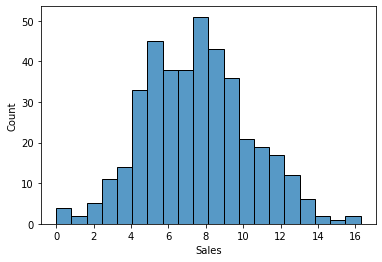

In [8]:
sns.histplot(data[var], bins = 20)
plt.show()

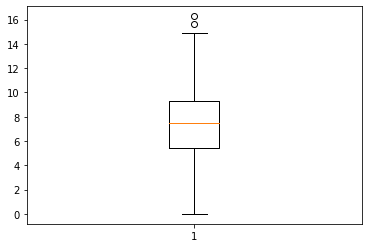

[5.39 0.  ]
[ 9.32 14.9 ]


In [10]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>8000달러 인근에서 대부분의 데이터가 정규분포와 같은 모양을 하고 있으나, 최대값 16000달러 근처에 유의미하게 데이터가 모여 있습니다. 이 데이터들의 다른 변수들을 살펴보면 매출액이 높은 이유에 대한 힌트를 도출할 수도 있습니다.

8) 추가 분석해 볼 사항이 있나요?

1. 매출액이 15000달러 이상인 지역의 다른 변수값들

### ② CompPrice

In [11]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

>경쟁사들의 가격

2) 숫자, 범주?

>숫자형, 단위 달러

3) NaN 존재 유무 및 조치방안

In [12]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

>필요없음

5) 기초통계량(수치화)

In [13]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

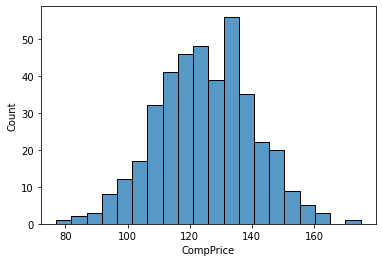

In [17]:
sns.histplot(data[var], bins = 20)
plt.show()

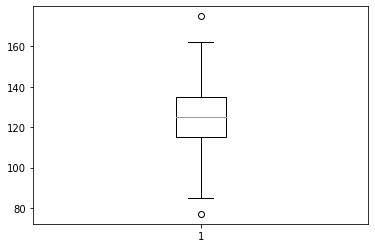

[115.  85.]
[135. 162.]


In [18]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>대체로 130달러 전후로 가격대가 형성되어 있는것 을 볼 수 있습니다. 135달러에는 특별이 많은 데이터가 모여 있기 때문에 135달러에의미와 시중에 나와있는 구체적인 제품에 대한 조사가 필요해 보입니다. 또한, 80달러와 175달러에 최소와 최대값이 선정되어 있습니다. 다른 데이터들과 많은 차이를 보이는 이상치 처럽 보이기 때문에 구체적인 제품을 찾아보고 대처할 필요가 있어 보입니다.

8) 추가 분석해 볼 사항이 있나요?

>1. 135달러 제품
2. 80달러 제품
3. 175달러 제품

### ③ Income

In [21]:
var = 'Income'

1) 변수의 비즈니스 의미

>지역 평균 소득, 단위 1000달러

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [23]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

>필요없음

5) 기초통계량(수치화)

In [24]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Income', ylabel='Count'>

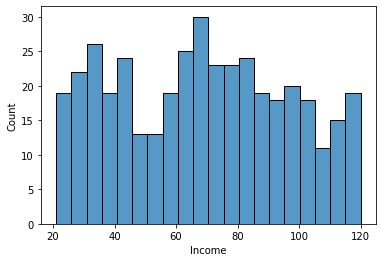

In [26]:
sns.histplot(data[var], bins=20)

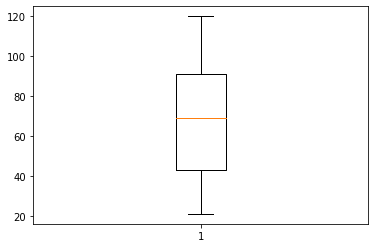

[42.75 21.  ]
[ 91. 120.]


In [28]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 20부터 120까지 골고루 퍼져있는 형태의 데이터를 결과로 얻을 수 있었습니다. 변수가 직역별 수익이기 때문에 지역에 따른 평균 수익이 확실하게 나고, 부촌과 그렇지 못한지역이 확연히 나뉘어 있다는 것을 알 수 있습니다.
사람들의 평균 나이 등 다른 요건을 살펴 볼 필요가 있으나, 일반적으로 부촌에 사는 사람들이 더 많은 카시트를 구매할 것이라 예상해 볼 수 있습니다.

8) 추가 분석해 볼 사항이 있나요?

>1. 평균수익이 높은 지역의 평균 나이

### ④ Advertising

In [47]:
var = 'Advertising'

1) 변수의 비즈니스 의미

>지역별 광고예산, 1000달러

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [30]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

>없음

5) 기초통계량(수치화)

In [31]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Advertising', ylabel='Count'>

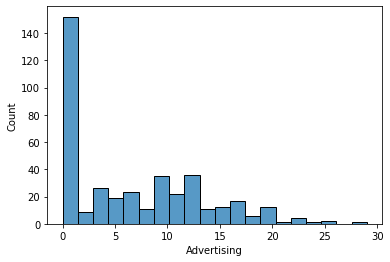

In [33]:
sns.histplot(data[var], bins=20)

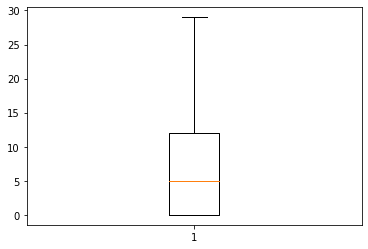

[0. 0.]
[12. 29.]


In [48]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>25%의 지역은 광고를 하지 않습니다. 또한 50%지역까지 5000달러를 사용하고 있습니다. 만약 구매력이 높은 지역 또는 어린 나이의 자려를 둔 나잇대의 사람들이 많은 지역에 광고비를 사용하고 있지 않다면 처음에 의견으로 나온 지역별 광고비 책정이 잘못되었다는 가정이 맞을수도 있습니다.

8) 추가 분석해 볼 사항이 있나요?

>1. 소득 상위 수준의 데이터만으로 지역별 광고비
2. 25~35세가 많이 분포한 지역의 지역별 광고비

### ⑤ Population

In [49]:
var = 'Population'

2) 숫자, 범주?

>숫자, 단위 1000명

3) NaN 존재 유무 및 조치방안

In [35]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

>없음

5) 기초통계량(수치화)

In [36]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

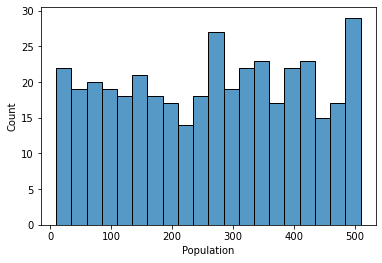

In [38]:
sns.histplot(data[var], bins=20)
plt.show()

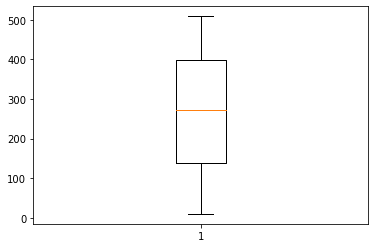

[139.  10.]
[398.5 509. ]


In [50]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>1만명 부터 50만명까지 고르게 분포되어 있습니다. 인구수가 많다는 것은 그 자체로 시장에 크기에 가장 주요한 요인 중 하나가 될 수 있으며, 약 50만명의 도시의 수가 상대적으로 다른 도시들보다 많으며, 이 도시를 중심으로 광고가 잘 이루어지는지 확인할 필요가 있습니다. 또한 약 50만명 지역의 나이 또한 할펴보며 가장 주요한 시장타겟을 파악할 필요도 있습니다.  

8) 추가 분석해 볼 사항이 있나요?

>1. 50만명 인구의 카시트가 필요한 인구와 평균 소득

### ⑥ Price

In [51]:
var = 'Price'

1) 변수의 비즈니스 의미

>자사 지역별 판매가, 달러

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [41]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

>없음

5) 기초통계량(수치화)

In [42]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

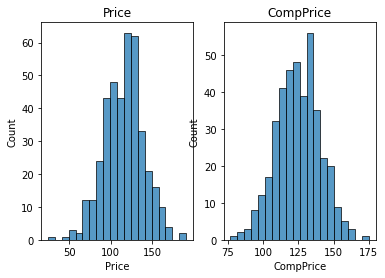

In [45]:
plt.subplot(1,2,1)
sns.histplot(data[var], bins=20)
plt.title('Price')

plt.subplot(1,2,2)
sns.histplot(data['CompPrice'], bins=20)
plt.title('CompPrice')

plt.show()

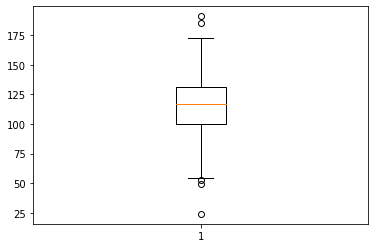

[100.  54.]
[131. 173.]


In [52]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>경쟁사와 비교하여 대체로 비슷한 가격을 형성하고 있습니다. 그러나, 경쟁사들의 비해 150달러 근처인 고가에 가격이 많이 형성되어 있습니다. 또한, 최대값이 다른 경쟁사들은 175달러인것에 비해 자사제품은 191달러의 제품 또한 형성되어 있습니다.

8) 추가 분석해 볼 사항이 있나요?

>1. 191달러 제품

### ⑦ ShelveLoc

In [54]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

>진열 상태

2) 숫자, 범주?

>범주, Bad, Good, Medium

In [56]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [57]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
# 변환 코드
# data = pd.get_dummies(data, columns=[var], drop_first=True)

5) 기초통계량(수치화)

In [59]:
print(data[var].value_counts())
print('-' * 50)
print(data[var].value_counts()/ len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
--------------------------------------------------
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


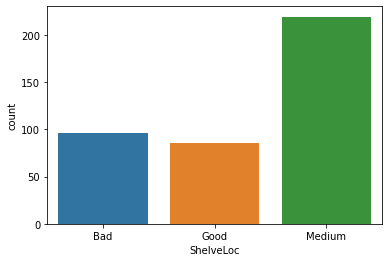

In [60]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 대부분 중간의 진열상태를 보입니다. 그러나 좋은 상태의 진열상태보다 나쁜 상태가 많은것은 개선을 할 필욕 있습니다. 어떻게 하면 Bad상태를 계선할 수 있을지 연구가 필요해보입니다.

8) 추가 분석해 볼 사항이 있나요?

>1. Bad, Good, Medium의 기준
2. Bad 개선 여부

### ⑧ Age

In [62]:
var = 'Age'

1) 변수의 비즈니스 의미

>지역별 평균 연령, 단위 세

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [63]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

>불필요

5) 기초통계량(수치화)

In [64]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

<AxesSubplot:xlabel='Age', ylabel='Count'>

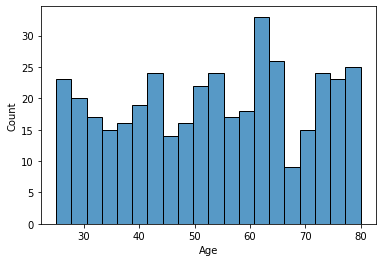

In [65]:
sns.histplot(data[var], bins=20)

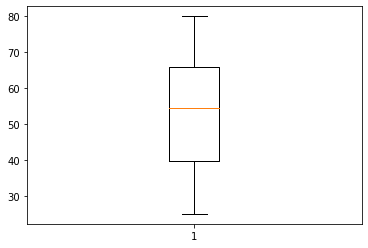

[39.75 25.  ]
[66. 80.]


In [66]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>평균열령은 자녀와 부모 모두를 합치고 나눈 값으로 세대를 대표하기에 부적절할 수 있습니다. 그러나 극단적으로 평균값이 높은 70이상의 평균연령의 초고령 도시의 경우 카시트를 구매하는 고객이 매우 적을 것이라 예상해볼 수 있습니다.

8) 추가 분석해 볼 사항이 있나요?

>1. 평균나이 60대 초반의 의미

### ⑨ Urban

In [68]:
var = 'Urban'

1) 변수의 비즈니스 의미

>도심 여부

2) 숫자, 범주?

>범주 Yes, No

In [70]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [71]:
data[var].isnull().sum()

0

4) 가변수화 필요 여부

In [ ]:
# data[var] = np.where(data[var] == 'Yes', 1, 0)

5) 기초통계량(수치화)

In [73]:
print(data[var].value_counts())
print('-' * 50)
print(data[var].value_counts()/ len(data[var]))

Yes    282
No     118
Name: Urban, dtype: int64
--------------------------------------------------
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


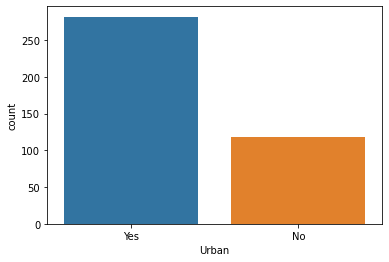

In [74]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>도심이 압도적으로 높습니다. 도심의 기준을 어떻게 잡았는지는 알 수 없으나 도심이 아닐 경우 고령인구가 많이 카시트가 필요한 인구의 비율이 높지 않을 수 있습니다.

8) 추가 분석해 볼 사항이 있나요?

>1. 도심이 아닌 지역의 판매액

### ⑩ US

In [75]:
var = 'US'

1) 변수의 비즈니스 의미

>매장이 미국에 있는지 여부

2) 숫자, 범주?

>범주, Yes, No

In [76]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [77]:
data[var].describe()

count     400
unique      2
top       Yes
freq      258
Name: US, dtype: object

4) 가변수화 필요 여부

In [ ]:
# data[var] = np.where(data[var] == 'Yes', 1, 0)

5) 기초통계량(수치화)

In [78]:
print(data[var].value_counts())
print('-' * 50)
print(data[var].value_counts()/ len(data[var]))

Yes    258
No     142
Name: US, dtype: int64
--------------------------------------------------
Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


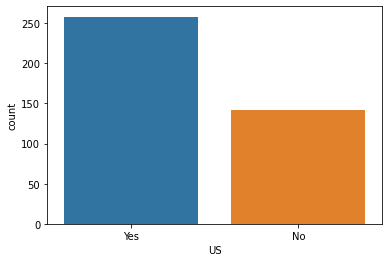

In [79]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

>국내 시장이 해외에 비해 2배 이상 높습니다. 현제 데이터는 지역수 이기 때문에 가로축을 판매액으로 다시 볼 필요가 있으며, 너무 국내 시장에 집중되어 있는지 여부는 그 때 파악할 수 있을 것으로 보입니다.

8) 추가 분석해 볼 사항이 있나요?

>1. 국내 여부 별 판매액